# 들어가기전에

### 양해말씀
- 회귀분석 하는건 R이 편해서 R로 분석을 다 마치고 파이썬으로 코드를 옮기려다 보니 R에서는 지원이 되지만 Python 으로는 같은 기능을 찾지 못해서 혼합해서 사용했습니다.
- 책의 목적에 맞게 ***Scikit-Learn***을 최대한 사용해야 하지만, Regression 부분에 기능이 미약하고 범주형 변수는 지원이 되지 않아 ***StatsModels*** 라이브러리를 사용했습니다.

### 사용한 데이터
- *Student Performance Data Set* (포르투갈)
- 학생의 성별, 나이, 가족 규모, 부모님의 교육수준 등을 이용해서 성적을 추론
- 총 649개의 데이터, 33개의 변수들

In [ ]:
# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
#1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
#2 sex - student's sex (binary: 'F' - female or 'M' - male) 
#3 age - student's age (numeric: from 15 to 22) 
#4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
#5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
#6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
#7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
#8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
#9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
#10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
#11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
#12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
#13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
#14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
#15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
#16 schoolsup - extra educational support (binary: yes or no) 
#17 famsup - family educational support (binary: yes or no) 
#18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
#19 activities - extra-curricular activities (binary: yes or no) 
#20 nursery - attended nursery school (binary: yes or no) 
#21 higher - wants to take higher education (binary: yes or no) 
#22 internet - Internet access at home (binary: yes or no) 
#23 romantic - with a romantic relationship (binary: yes or no) 
#24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
#25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
#26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
#27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
#28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
#29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
#30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
#31 G1 - first period grade (numeric: from 0 to 20) 
#31 G2 - second period grade (numeric: from 0 to 20) 
#32 G3 - final grade (numeric: from 0 to 20, output target)

In [13]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from hblee import st
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from biokit.viz import corrplot ## pip install Biokit

In [2]:
mydata = pd.read_csv("/Users/hsw/Desktop/개인 파일/스터디/Machine Learning/파.머/1주차 발표/Student/student-por.csv", sep=";")

In [3]:
mydata

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [5]:
st(mydata)

<class 'pandas.core.frame.DataFrame'> : dimension of (649, 33)
Index: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ...  : int64 

school      object                                         [[GP]]
sex         object                                       [[F, M]]
age          int64                             [[18, 17, 15, 16]]
address     object                                       [[U, R]]
famsize     object                                   [[GT3, LE3]]
Pstatus     object                                       [[A, T]]
Medu         int64                                 [[4, 1, 3, 2]]
Fedu         int64                              [[4, 1, 2, 3, 0]]
Mjob        object  [[at_home, health, other, services, teacher]]
Fjob        object  [[teacher, other, services, health, at_home]]
reason      object            [[course, other, home, reputation]]
guardian    object                      [[mother, father, other]]
traveltime   int64                                 [[2, 1, 3, 4]]
studytime    int64          

In [6]:
num_mydata = mydata[['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]
num_mydata

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
5,16,4,3,1,2,0,5,4,2,1,2,5,6,12,12,13
6,16,2,2,1,2,0,4,4,4,1,1,3,0,13,12,13
7,17,4,4,2,2,0,4,1,4,1,1,1,2,10,13,13
8,15,3,2,1,2,0,4,2,2,1,1,1,0,15,16,17
9,15,3,4,1,2,0,5,5,1,1,1,5,0,12,12,13


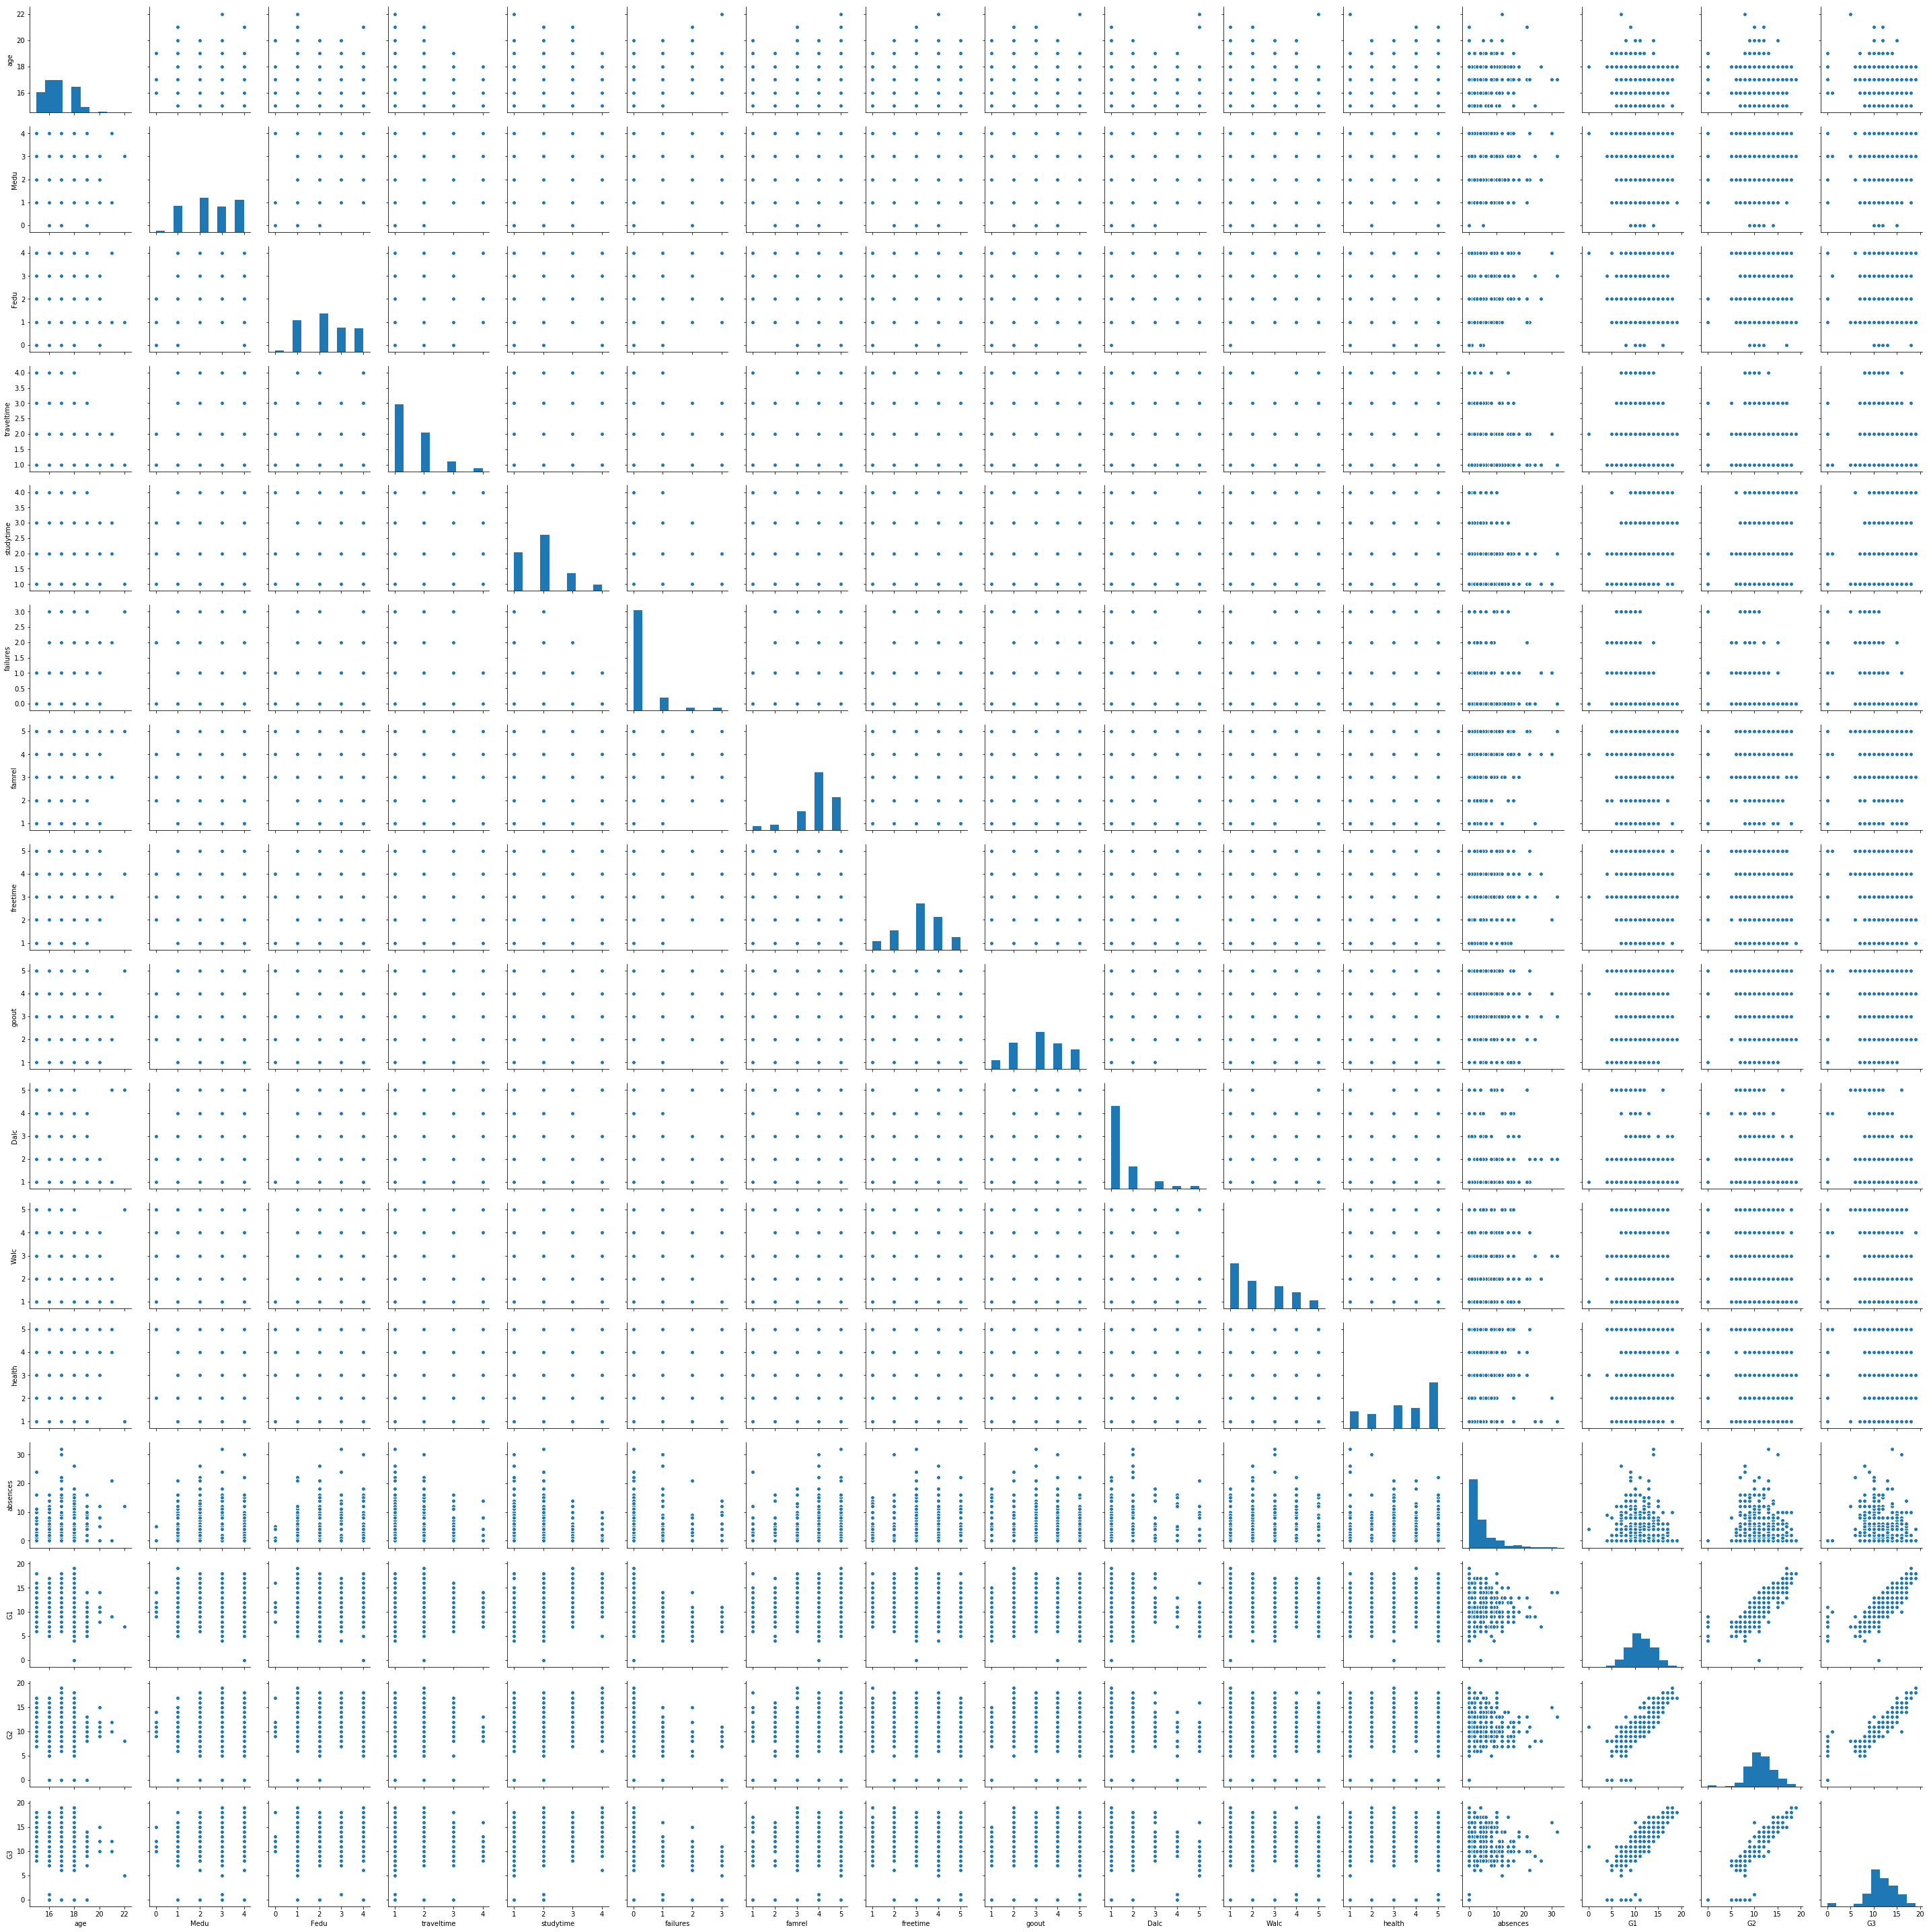

In [7]:
seaborn.pairplot(num_mydata)
plt.show()
plt.close()

In [8]:
num_mydata.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


#### Correlation Plot 참고
- http://nbviewer.jupyter.org/github/biokit/biokit/blob/master/notebooks/viz/corrplot.ipynb

Computing correlation


/Users/hsw/anaconda/envs/tensorflow/lib/python3.5/site-packages/biokit/viz/linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)


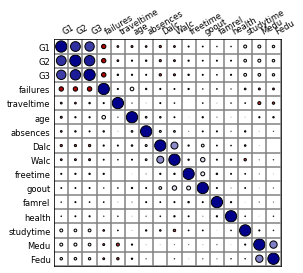

In [9]:
c = corrplot.Corrplot(num_mydata)
c.plot(colorbar=False, method='circle',shrink=0.8)
plt.show()
plt.close()

## R 프로그램을 이용해서 Stepwise Selection (Python 에서는 아직 찾지 못했습니다.)
### Stepwise Selection 
- 모델링 할 때 사용 (**처음에 막막 할 때..**)
- 자매품 : *Forward Selection, Backward Elimination*
- 기준은 프로그램 마다 다름. (AIC, BIC, RSS, R-Sqaured 등등)
- 기준에 따라 변수를 넣고 빼면서, 최종적으로는 아무것도 들어갈 변수도 없고 뺄 변수도 없을 때 종료
- R 기준으로 돌렸을 때 G3를 설명하기에 **School, Sex, Reason, Traveltime, Failures, Health, Absences, G1, G2** 가 가장 적절하다고 판단
- 나온 변수를 통째로 넣고 다중회귀분석을 실시해보았다.

In [10]:
fit_1 = smf.ols(formula='G3 ~ school + sex + reason + traveltime + failures + health + absences + G1 + G2', data=mydata).fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     340.7
Date:                Thu, 31 Aug 2017   Prob (F-statistic):          2.58e-258
Time:                        20:36:57   Log-Likelihood:                -1055.5
No. Observations:                 649   AIC:                             2135.
Df Residuals:                     637   BIC:                             2189.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4406      0.342      1.290      0.198      -0.230       1.112
school[T.MS]            -0.2298      0.116     -1.977      0.048      -0.458      -0.002
sex[T.M]                -0.2002      0.102     -1.965      0.050      -0.400   -9.28e-05
reason[T.home]          -0.0922      0.130     -0.709      0.479      -0.348       0.163
reason[T.other]         -0.4499      0.166     -2.706      0.007      -0.776      -0.123
reason[T.reputation]    -0.1654      0.133     -1.244      0.214      -0.426       0.096
traveltime               0.1123      0.068      1.642      0.101      -0.022       0.247
failures                -0.2405      0.091     -2.650      0.008      -0.419      -0.062
health                  -0.0539      0.035     -1.555      0.120      -0.122       0.014
absences                 0.0162      0.011      1.476      0.141      -0.005       0.038
G1                       0.1371      0.036      3.792      0.000       0.066       0.208
G2                       0.8800      0.034     26.042      0.000       0.814       0.946
==============================================================================
Omnibus:                      451.928   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9470.136
Skew:                          -2.804   Prob(JB):                         0.00
Kurtosis:                      20.854   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 다중회귀분석 결과 해석
- 결과 P-value가 다 유의하게 보이지는 않는다. ( 변수를 빼거나 변수변환( *루트, 로그, 제곱 등등* )이 필요할 듯 )
- R-Squared는 0.855, Adj.R-Squared는 0.852로 실제 데이터를 돌린 거 치고는 매우 모델이 잘맞는듯. (아무 생각 없이 한번 돌려보기에 Stepwise가 좋은 것 같아요.)
- *Reason* 변수 같은 범주형 변수들은 취급하는 데 굉장히 조심해야 합니다. 프로그램마다 다르기는 한데, 보통 범주가 4개가 있으면 3개의 가변수를 만들고 해석은 나머지 1개 변수와의 차이로 합니다. 윗 식에서는, *course* 보다 *home*이 -0.0922점이 낮다는 식으로 해석을 해야 합니다.
- p-value 값을 보면 *Reason* 변수의 *other*만 유의하고 나머지는 유의하지 않은 데, 이 때는 유의하지 않는 변수만 제거하는 게 아니라 *Reason* 변수 자체를 버려야 합니다. 

In [11]:
new_label = ['course', 'other', 'home', 'reputation']
mydata['n.reason'] = mydata['reason'].map(lambda x : new_label.index(x))
mydata[['reason','n.reason']]

,reason,n.reason
0,course,0
1,course,0
2,other,1
3,home,2
4,home,2
5,reputation,3
6,home,2
7,home,2
8,home,2
9,home,2


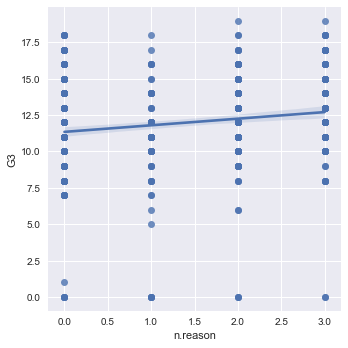

In [14]:
sns.set()
g = sns.lmplot(x="n.reason", y="G3", truncate=True, size=5, data=mydata)
plt.show()
plt.close()

In [15]:
fit_2 = smf.ols(formula='G3 ~ school + sex + traveltime + failures + health + absences + G1 + G2', data=mydata).fit()
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     464.1
Date:                Thu, 31 Aug 2017   Prob (F-statistic):          1.31e-260
Time:                        20:47:15   Log-Likelihood:                -1059.4
No. Observations:                 649   AIC:                             2137.
Df Residuals:                     640   BIC:                             2177.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3181      0.336      0.947      0.344      -0.341       0.978
school[T.MS]    -0.2623      0.114     -2.300      0.022      -0.486      -0.038
sex[T.M]        -0.2183      0.102     -2.143      0.032      -0.418      -0.018
traveltime       0.1192      0.068      1.749      0.081      -0.015       0.253
failures        -0.2199      0.090     -2.433      0.015      -0.397      -0.042
health          -0.0485      0.034     -1.408      0.160      -0.116       0.019
absences         0.0164      0.011      1.496      0.135      -0.005       0.038
G1               0.1354      0.036      3.734      0.000       0.064       0.207
G2               0.8815      0.034     26.031      0.000       0.815       0.948
==============================================================================
Omnibus:                      457.438   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9577.454
Skew:                          -2.855   Prob(JB):                         0.00
Kurtosis:                      20.932   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

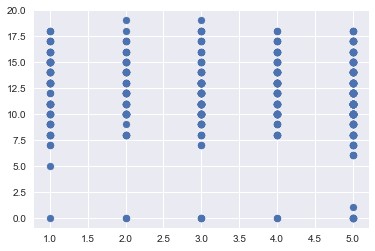

In [16]:
plt.scatter(mydata['health'],mydata['G3'])
plt.show()
plt.close()

In [17]:
fit_2 = smf.ols(formula='G3 ~ school + sex + traveltime + failures + absences + G1 + G2', data=mydata).fit()
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     529.3
Date:                Thu, 31 Aug 2017   Prob (F-statistic):          1.48e-261
Time:                        20:48:14   Log-Likelihood:                -1060.4
No. Observations:                 649   AIC:                             2137.
Df Residuals:                     641   BIC:                             2173.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1155      0.304      0.381      0.704      -0.481       0.712
school[T.MS]    -0.2523      0.114     -2.215      0.027      -0.476      -0.029
sex[T.M]        -0.2364      0.101     -2.338      0.020      -0.435      -0.038
traveltime       0.1240      0.068      1.821      0.069      -0.010       0.258
failures        -0.2212      0.090     -2.446      0.015      -0.399      -0.044
absences         0.0173      0.011      1.574      0.116      -0.004       0.039
G1               0.1339      0.036      3.692      0.000       0.063       0.205
G2               0.8850      0.034     26.190      0.000       0.819       0.951
==============================================================================
Omnibus:                      457.969   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9602.797
Skew:                          -2.860   Prob(JB):                         0.00
Kurtosis:                      20.956   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

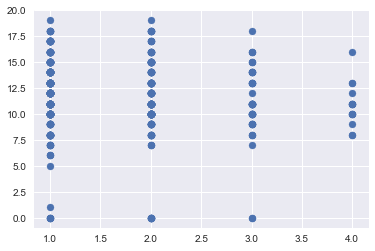

In [18]:
plt.scatter(mydata['traveltime'],mydata['G3'])
plt.show()
plt.close()

/Users/hsw/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


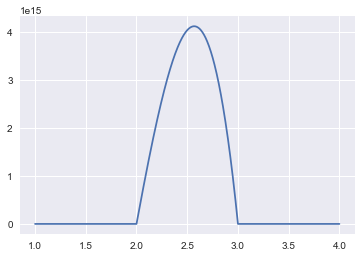

In [19]:
xnew = np.linspace(mydata['traveltime'].min(),mydata['traveltime'].max(),1000) 
power_smooth = spline(mydata['traveltime'],mydata['G3'],xnew)

plt.plot(xnew,power_smooth)
plt.show()
plt.close()

In [20]:
mydata['traveltime_2'] = np.array(mydata['traveltime'])**2
fit_3 = smf.ols(formula='G3 ~ school + sex + traveltime_2 + failures + absences + G1 + G2', data=mydata).fit()
fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     530.2
Date:                Thu, 31 Aug 2017   Prob (F-statistic):          9.30e-262
Time:                        20:51:24   Log-Likelihood:                -1059.9
No. Observations:                 649   AIC:                             2136.
Df Residuals:                     641   BIC:                             2172.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1976      0.289      0.684      0.494      -0.369       0.765
school[T.MS]    -0.2477      0.113     -2.196      0.028      -0.469      -0.026
sex[T.M]        -0.2386      0.101     -2.361      0.019      -0.437      -0.040
traveltime_2     0.0333      0.016      2.062      0.040       0.002       0.065
failures        -0.2180      0.090     -2.414      0.016      -0.395      -0.041
absences         0.0175      0.011      1.595      0.111      -0.004       0.039
G1               0.1332      0.036      3.676      0.000       0.062       0.204
G2               0.8866      0.034     26.235      0.000       0.820       0.953
==============================================================================
Omnibus:                      458.073   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9543.923
Skew:                          -2.863   Prob(JB):                         0.00
Kurtosis:                      20.893   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
plt.scatter(mydata['absences'],mydata['G3'])
xnew = np.linspace(mydata['absences'].min(),mydata['absences'].max(),1000) 
power_smooth = spline(mydata['absences'],mydata['G3'],xnew)
plt.show()
plt.plot(xnew,power_smooth)
plt.show()
plt.close()

In [36]:
mydata['absences_2'] = np.array(mydata['absences'])**2
#fit_4 = smf.ols(formula='G3 ~ school + sex + traveltime_2 + failures + absences + absences_2 + G1 + G2', data=mydata).fit()
#fit_4.summary()
fit_4 = smf.ols(formula='G3 ~  absences', data=mydata).fit()
fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.448
Date:                Thu, 31 Aug 2017   Prob (F-statistic):             0.0199
Time:                        21:05:46   Log-Likelihood:                -1678.7
No. Observations:                 649   AIC:                             3361.
Df Residuals:                     647   BIC:                             3370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1388      0.161     75.399      0.000      11.823      12.455
absences      -0.0636      0.027     -2.334      0.020      -0.117      -0.010
==============================================================================
Omnibus:                      130.386   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.149
Skew:                          -0.993   Prob(JB):                     2.29e-79
Kurtosis:                       6.074   Cond. No.                         7.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
fit_4 = smf.ols(formula='G3 ~  absences + absences_2', data=mydata).fit()
fit_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.866
Date:                Thu, 31 Aug 2017   Prob (F-statistic):             0.0577
Time:                        20:56:35   Log-Likelihood:                -1678.6
No. Observations:                 649   AIC:                             3363.
Df Residuals:                     646   BIC:                             3377.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1820      0.180     67.700      0.000      11.829      12.535
absences      -0.0912      0.058     -1.572      0.117      -0.205       0.023
absences_2     0.0017      0.003      0.538      0.590      -0.004       0.008
==============================================================================
Omnibus:                      133.531   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.923
Skew:                          -1.011   Prob(JB):                     1.42e-82
Kurtosis:                       6.139   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
fit_4 = smf.ols(formula='G3 ~  absences_2', data=mydata).fit()
fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.254
Date:                Thu, 31 Aug 2017   Prob (F-statistic):             0.0717
Time:                        20:56:44   Log-Likelihood:                -1679.8
No. Observations:                 649   AIC:                             3364.
Df Residuals:                     647   BIC:                             3373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9970      0.136     88.035      0.000      11.729      12.265
absences_2    -0.0026      0.001     -1.804      0.072      -0.005       0.000
==============================================================================
Omnibus:                      120.161   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.677
Skew:                          -0.938   Prob(JB):                     4.66e-69
Kurtosis:                       5.850   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
np.corrcoef(mydata['absences_2'],mydata['absences'])

array([[ 1.        ,  0.88266549],
       [ 0.88266549,  1.        ]])

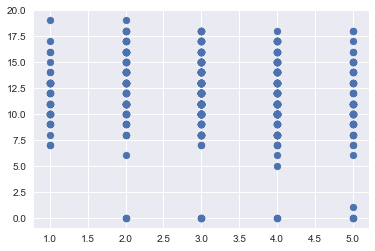

In [33]:
plt.scatter(mydata['freetime'],mydata['G3'])
plt.show()
plt.close()

In [ ]:
st(mydata)

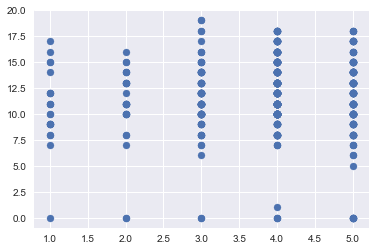

In [34]:
plt.scatter(mydata['famrel'],mydata['G3'])
plt.show()
plt.close()

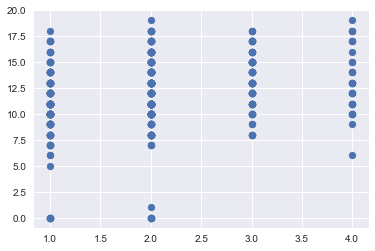

In [35]:
plt.scatter(mydata['studytime'],mydata['G3'])
plt.show()
plt.close()